In [1]:
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import xhermes
import scipy
import re

onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from hermes3.case_db import *
from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *
import matplotlib as mpl

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
coef0 = 1.7771187911e+00
coef1 = 2.6208752063e-01
coef2 = -4.3628845453e+00
coef3 = 6.9313646677e+00
coef4 = -5.4323333468e+00
coef5 = 2.5336063994e+00
coef6 = -7.4611637546e-01
coef7 = 1.4030619392e-01
coef8 = -1.6355025649e-02
coef9 = 1.0769222723e-03
coef10 = -3.0614093735e-05

y = np.linspace(0, 2 * np.pi, 100)

J = 0  + coef0 + y*coef1 + y*y*coef2 + y*y*y*coef3 + y*y*y*y*coef4 + y*y*y*y*y*coef5 + y*y*y*y*y*y*coef6 + y*y*y*y*y*y*y*coef7 + y*y*y*y*y*y*y*y*coef8 + y*y*y*y*y*y*y*y*y*coef9 + y*y*y*y*y*y*y*y*y*y*coef10


In [5]:
%matplotlib inline

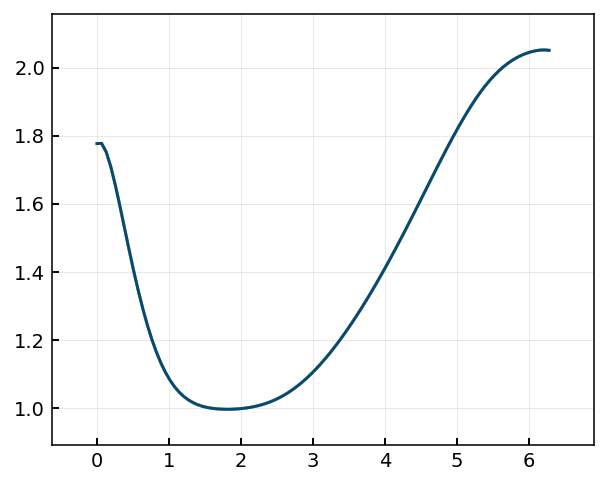

In [6]:
plt.plot(y, J)
plt.show()

In [2]:
# db = CaseDB()

# toload = {
#     "base" : "spr45_realJ_dz-1_ny800_dymin0-25_rtol1e-9_kla-0-2_fimp-1-5_udens-4-3",
# }

cs = dict()   # casestore

# for name in toload:
#     print(f"Loading {toload[name]}")
cs["base"] = Load.case_1D(
    r"C:\Users\mikek\OneDrive\Project\Lot 2\from\Matt\2024-02-16 - case with neutral reservoir peak at target\spr45_realJ_dz-1_ny432_dymin0-09_rtol1e-7_kla-0-2_fimp-1-5_udens-4-25_neutMom_rsv_Nd1e19_ts1e-3", 
    guard_replace = False)


Unnormalising with xHermes


c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 24
  result = blockwise(


In [5]:
xhermes?

Type:        module
String form: <module 'xhermes' (<_frozen_importlib_external._NamespaceLoader object at 0x000001A420D29600>)>
Docstring:   <no docstring>

In [4]:
%matplotlib inline
plt.close("all")

## Density

(77.7, 78.25)

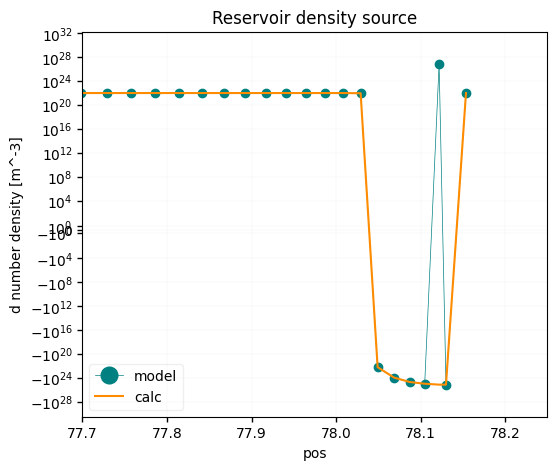

In [14]:
fig, ax = plt.subplots(dpi = 100)

ds = cs["base"].ds.isel(t=-1)
ds["Sd_rsv"].plot(ax = ax, label = "model", lw = 0.5, marker = "o")

src = (1e19-ds["Nd"])/1e-3
src.plot(ax = ax, label = "calc")
    
ax.set_title("Reservoir density source")
ax.legend(loc = "lower left")
ax.set_yscale("symlog")
ax.set_xlim(77.7,78.25)

## Pressure

(77.7, 78.25)

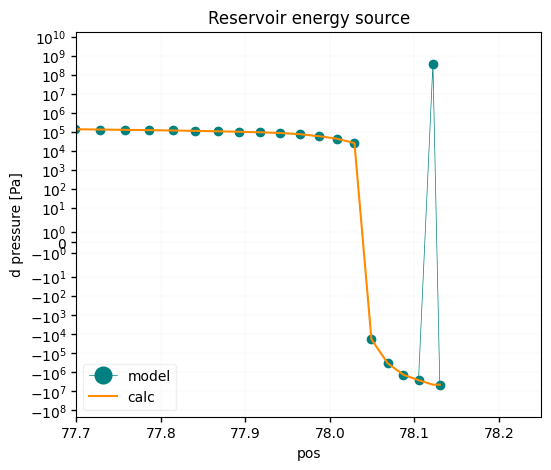

In [15]:
fig, ax = plt.subplots(dpi = 100)

Nrate = (1e19-ds["Nd"])/1e-3
Prate = (3/2) * ds["Pd"] / ds["Nd"] * Nrate
NVrate = ds["NVd"] / ds["Nd"] * Nrate

ds = cs["base"].ds.isel(t=-1)

ds["Ed_rsv"].plot(ax = ax, label = "model", lw = 0.5, marker = "o")
Prate.plot(ax = ax, label = "calc")
    
ax.set_title("Reservoir energy source")
ax.legend(loc = "lower left")
ax.set_yscale("symlog")
ax.set_xlim(77.7,78.25)

## Momentum

(77.7, 78.25)

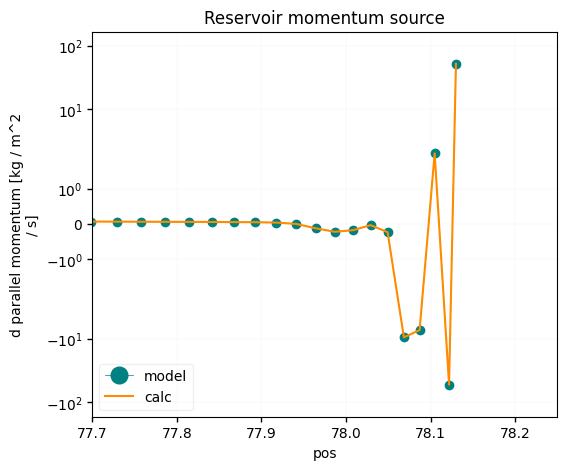

In [16]:
fig, ax = plt.subplots(dpi = 100)

Nrate = (1e19-ds["Nd"])/1e-3
Prate = (3/2) * ds["Pd"] / ds["Nd"] * Nrate
NVrate = ds["NVd"] / ds["Nd"] * Nrate

ds = cs["base"].ds.isel(t=-1)

ds["Fd_rsv"].plot(ax = ax, label = "model", lw = 0.5, marker = "o")
NVrate.plot(ax = ax, label = "calc")
    
ax.set_title("Reservoir momentum source")
ax.legend(loc = "lower left")
ax.set_yscale("symlog")
ax.set_xlim(77.7,78.25)